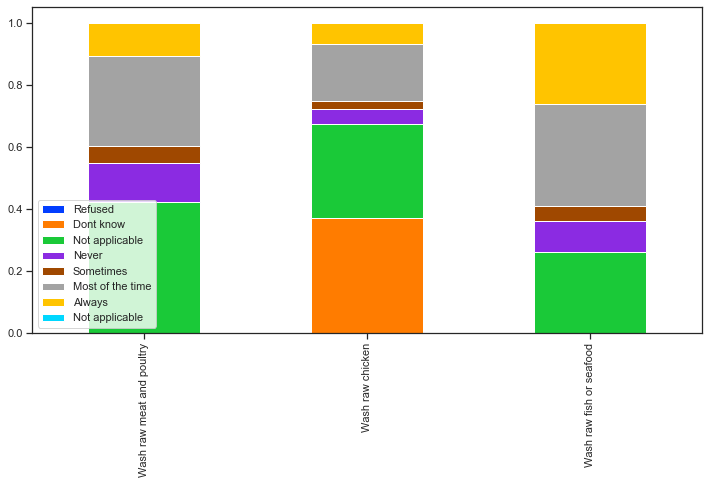

In [1]:
"""
Created on Thu Apr  2 21:14:12 2020

@author: charliejeynes

this analyses qustion 4 in the food and you survey data     
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")



# import data
df = pd.read_csv('/Users/charliejeynes/Documents/Pivago local documents/data/food survey/Food+and+You+Waves+1-5+Data (3).csv')

# create a dictionary for the code with the question
q4_dict = {
    #  'q4_1_4'	: 'Use different chopping boards for different foods'
    # ,'q4_1_5a'	: 'Store open tins in the fridge'
     'Q4_1_5_comb'	:  'Wash raw meat and poultry' # (W3-5: other than chicken)
    ,'q4_1_6'	: 'Wash raw chicken'
    ,'q4_1_7' :	'Wash raw fish or seafood'
    # ,'q4_1_8a' : 'Wash fruit and vegetables to be eaten raw'
    # ,'q4_1_8b'	: 'Wash fruit and vegetables to be eaten cooked'
    
    }

# create a dataframe with just these questions in it - as well as the region_dv column
# so that we can compare Wales to other regions
# create a list from the dict to get out the q4 columns
q4_col_labels = []
for k, v in q4_dict.items():
    q4_col_labels.append(k)

q4_col_labels.extend(['region_dv', 'surveyyear', 'hhdinc'])
df_q4_with_labels = df[q4_col_labels]

# select wales only entries and wave 5 
df_q4_with_labels_wales_wave5 = df_q4_with_labels[(df_q4_with_labels['region_dv'] == 10) 
                                                      & (df_q4_with_labels['surveyyear'] == 5)]

# percent the number of each value in each column - this creates a list 
df_percent = []
for l in q4_col_labels[0:3]:
  df_percent.append(df_q4_with_labels[l].value_counts(normalize=True))

# turn the list into a datafram  
df_percent = pd.DataFrame(df_percent)

# rename the questions using the dic
questions = []
for k, v in q4_dict.items():
    questions.append(v)
df_percent.index = questions

# rename the answers using the dic
ans = {  -9	:'Refused'
        ,-8	:'Dont know'
        ,-1	:'Not applicable'
        ,1	:'Never'
        ,2	:'Sometimes'
        ,3	:'Most of the time'
        ,4	:'Always'
        ,5	:'Not applicable'
      }
answers = []
for k, v in ans.items():
    answers.append(v)
df_percent.columns = answers


# plot out the result
from matplotlib.colors import ListedColormap
df_percent.plot(kind='bar', stacked=True,
          colormap=ListedColormap(sns.color_palette("bright", 10)), 
          figsize=(12,6))


















